In [ ]:
# PREPARATION

In [2]:
# Memeriksa Instalasi Library pada Laptop
import numpy as np
import matplotlib.pyplot as plt
import sys, glob
import soundfile as sf # untuk membaca audio
import sofa # untuk membaca SOFA HTRFs
import librosa # mensampel ulang fungsi
from scipy import signal # fast convolution function
import IPython.display as ipd
from IPython.display import Audio # mendengarkan audio di notebook
import pathlib

In [3]:
# Direktori Penyimpanan Dataset Audio
hrtf_dir_MIT = 'elev0/*.wav'
# (BELUM PERLU) source_dir = 'Samples 48k/*.wav'
# (BELUM PERLU) hrtf_dir_LISTEN = 'HRTFsets/LISTEN/IRC_1002/COMPENSATED/WAV/IRC_1002_C/*.wav'
# (BELUM PERLU) hrtf_dir_SOFA = 'HRTFsets/SOFA Far Field/*.sofa'

In [4]:
# Menginisialisasi variabel _MIT sebagai alamat folder dataset MIT
_MIT = glob.glob(hrtf_dir_MIT)
pathlib.Path().parent.resolve()

WindowsPath('D:/KULIAH/PKM-KC 2022/Program/3D Audio')

In [5]:
x = _MIT
print(_MIT)

['elev0\\L0e000a.wav', 'elev0\\L0e005a.wav', 'elev0\\L0e010a.wav', 'elev0\\L0e015a.wav', 'elev0\\L0e020a.wav', 'elev0\\L0e025a.wav', 'elev0\\L0e030a.wav', 'elev0\\L0e035a.wav', 'elev0\\L0e040a.wav', 'elev0\\L0e045a.wav', 'elev0\\L0e050a.wav', 'elev0\\L0e055a.wav', 'elev0\\L0e060a.wav', 'elev0\\L0e065a.wav', 'elev0\\L0e070a.wav', 'elev0\\L0e075a.wav', 'elev0\\L0e080a.wav', 'elev0\\L0e085a.wav', 'elev0\\L0e090a.wav', 'elev0\\L0e095a.wav', 'elev0\\L0e100a.wav', 'elev0\\L0e105a.wav', 'elev0\\L0e110a.wav', 'elev0\\L0e115a.wav', 'elev0\\L0e120a.wav', 'elev0\\L0e125a.wav', 'elev0\\L0e130a.wav', 'elev0\\L0e135a.wav', 'elev0\\L0e140a.wav', 'elev0\\L0e145a.wav', 'elev0\\L0e150a.wav', 'elev0\\L0e155a.wav', 'elev0\\L0e160a.wav', 'elev0\\L0e165a.wav', 'elev0\\L0e170a.wav', 'elev0\\L0e175a.wav', 'elev0\\L0e180a.wav', 'elev0\\L0e185a.wav', 'elev0\\L0e190a.wav', 'elev0\\L0e195a.wav', 'elev0\\L0e200a.wav', 'elev0\\L0e205a.wav', 'elev0\\L0e210a.wav', 'elev0\\L0e215a.wav', 'elev0\\L0e220a.wav', 'elev0\\L

In [6]:
# BAGIAN 1

# Virtualisasi dataset audio dari MIT
# Penggunaan konvolusi domain waktu (time domain convolusion)

In [7]:
# Menampilkan Daftar File dalam Alamat Folder yang Dituju
_MIT.sort()
_MIT

['elev0\\L0e000a.wav',
 'elev0\\L0e005a.wav',
 'elev0\\L0e010a.wav',
 'elev0\\L0e015a.wav',
 'elev0\\L0e020a.wav',
 'elev0\\L0e025a.wav',
 'elev0\\L0e030a.wav',
 'elev0\\L0e035a.wav',
 'elev0\\L0e040a.wav',
 'elev0\\L0e045a.wav',
 'elev0\\L0e050a.wav',
 'elev0\\L0e055a.wav',
 'elev0\\L0e060a.wav',
 'elev0\\L0e065a.wav',
 'elev0\\L0e070a.wav',
 'elev0\\L0e075a.wav',
 'elev0\\L0e080a.wav',
 'elev0\\L0e085a.wav',
 'elev0\\L0e090a.wav',
 'elev0\\L0e095a.wav',
 'elev0\\L0e100a.wav',
 'elev0\\L0e105a.wav',
 'elev0\\L0e110a.wav',
 'elev0\\L0e115a.wav',
 'elev0\\L0e120a.wav',
 'elev0\\L0e125a.wav',
 'elev0\\L0e130a.wav',
 'elev0\\L0e135a.wav',
 'elev0\\L0e140a.wav',
 'elev0\\L0e145a.wav',
 'elev0\\L0e150a.wav',
 'elev0\\L0e155a.wav',
 'elev0\\L0e160a.wav',
 'elev0\\L0e165a.wav',
 'elev0\\L0e170a.wav',
 'elev0\\L0e175a.wav',
 'elev0\\L0e180a.wav',
 'elev0\\L0e185a.wav',
 'elev0\\L0e190a.wav',
 'elev0\\L0e195a.wav',
 'elev0\\L0e200a.wav',
 'elev0\\L0e205a.wav',
 'elev0\\L0e210a.wav',
 'elev0\\L0

In [8]:
# Memasukkan file HRIR sesuai dengan Nomor File yang Diindekskan
az_index = 0
print('Using HRTF: ' + _MIT[az_index])
[HRIR,fs_H] = sf.read(_MIT[az_index])
# print('Sample rate =' + str(fs_H))
# print('Data dimensions: ',HRIR.shape)

Using HRTF: elev0\L0e000a.wav


In [ ]:
# panggil cpp
# import os
# os.listdir('../pixy2/src/host/libpixyusb2/include')
# os.getcwd()

# import subprocess

# cpp_path = "../pixy2/src/host/libpixyusb2_examples/get_blocks_cpp_demo/get_blocks_cpp_demo.cpp"
# cpp_path = "../pixy2/src/host/libpixyusb2/include/libpixyusb2.h"

# subprocess.call(["g++", cpp_path])
# subprocess.call("./a.out")

In [16]:
import os
import wave
import threading
import sys
import time

# PyAudio Library
import pyaudio

class WavePlayerLoop(threading.Thread):
    CHUNK = 1024

    def __init__(self, filepath, loop):
        """
        Initialize `WavePlayerLoop` class.
        PARAM:
            -- filepath (String) : File Path to wave file.
            -- loop (boolean)    : True if you want loop playback.
                                   False otherwise.
        """
        super(WavePlayerLoop, self).__init__()
        self.filepath = os.path.abspath(filepath)
        self.loop = loop

    def run(self):
        # Open Wave File and start play!
        wf = wave.open(self.filepath, 'rb')
        player = pyaudio.PyAudio()

        # Open Output Stream (based on PyAudio tutorial)
        stream = player.open(format=player.get_format_from_width(wf.getsampwidth()),
                             channels=wf.getnchannels(),
                             rate=wf.getframerate(),
                             output=True)

        # PLAYBACK LOOP
        data = wf.readframes(self.CHUNK)
        while self.loop:
            stream.write(data)
            data = wf.readframes(self.CHUNK)
            if data == b'':  # If file is over then rewind.
                wf.rewind()
                data = wf.readframes(self.CHUNK)
            time.sleep(1)

        stream.close()
        player.terminate()

    def play(self):
        """
        Just another name for self.start()
        """
        self.start()

    def stop(self):
        """
        Stop playback.
        """
        self.loop = False
        
az_index = 18
print('Using HRTF: ' + _MIT[az_index])
[HRIR,fs_H] = sf.read(_MIT[az_index])
# print('Sample rate =' + str(fs_H))
# print('Data dimensions: ',HRIR.shape)


Using HRTF: elev0\L0e090a.wav
Sample rate =44100
Data dimensions:  (512,)


In [19]:
player = WavePlayerLoop(_MIT[az_index], True)
player.play()

In [20]:
player.stop()

In [34]:
print('c')

c


ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


In [27]:
# Membunyikan HRIR



# fs_h = 44100# sample rate
# T = 10.0# seconds
# t = np.linspace(0, T, int(T*fs_h, endpoint=False)# time variable

# for i in range(1000):
#     x = 0.5*np.sin(i*np.pi*440*t)
#     ipd.display(ipd.Audio(HRIR.transpose(), rate=fs_h))

# sr = 22050# sample rate
# T = 10.0# seconds
# t = np.linspace(0, T, int(T*sr), endpoint=False)# time variable
# x = 0.5*np.sin(2*np.pi*440*t)
# Audio(HRIR.transpose(), rate=sr)

# for i in range(10):
# Audio(HRIR.transpose(), rate=fs_H, autoplay=True)

# for i in range(10):
#     Audio.display(Audio.Audio(HRIR.transpose(), rate=fs_H))

# Audio(HRIR.transpose(), rate=fs_H)

SyntaxError: invalid syntax (<ipython-input-27-e5482c5c1562>, line 7)

<ipython-input-9-47707be75ee5>:7: UserWarning: Legend does not support 'L' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Left','Right');
<ipython-input-9-47707be75ee5>:7: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Left','Right');
<ipython-input-9-47707be75ee5>:7: UserWarning: Legend does not support 'f' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Left','Right');
<ipython-input-9-47707be75ee5>:7: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.

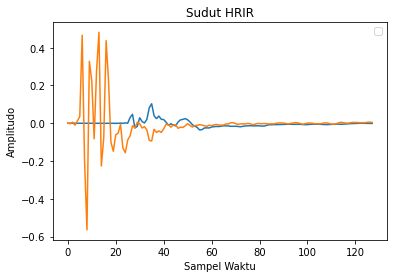

In [9]:
# Plot HRIR: Visualisasi Domain Waktu
plt.plot(HRIR[:,0]) # suara dari kiri
plt.plot(HRIR[:,1]) # suara dari kanan
plt.xlabel('Sampel Waktu')
plt.ylabel('Amplitudo')
plt.title('Sudut HRIR' + _MIT[az_index][27:-4])
plt.legend('Kiri','Kanan');

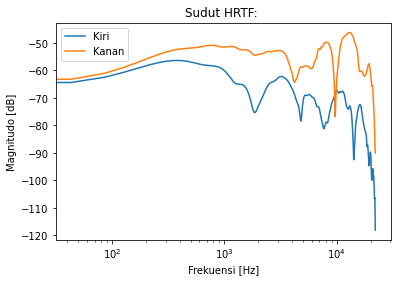

In [10]:
# Plot HRIR: Visualisasi dalam Domain Frekuensi
nfft = len(HRIR)*8
HRTF = np.fft.fft(HRIR, n=nfft, axis=0)
HRTF_mag = (2/nfft)*np.abs(HRTF[0:int(len(HRTF)/2)+1,:])
HRTF_mag_dB = 20*np.log10(HRTF_mag)

f_axis = np.linspace(0, fs_H/2, len(HRTF_mag_dB))
plt.semilogx(f_axis, HRTF_mag_dB)
plt.title('Sudut HRTF: ' + _MIT[az_index][27:-4])
plt.xlabel('Frekuensi [Hz]')
plt.ylabel('Magnitudo [dB]')
plt.legend(['Kiri','Kanan']);

In [ ]:
# BAGIAN 2

# Virtualisasi dataset audio dari folder LISTEN
# Belum perlu dikerjakan, selesaikan dulu percobaan BAGIAN 1

In [ ]:
# Masukkan sumber audio

source_idx = 19
print('Source is: ' + _SOURCES[source_idx][15:-8])
[sig, fs_s] = sf.read(_SOURCES[source_idx])
print('Sample rate: ', fs_s)
print('Data dimensions: ', sig.shape)

In [ ]:
# Mengubah suara stereo ke mono

if sig.shape[1]>1:
    sig_mono = np.mean(sig, axis=1)
else:
    sig_mono = sig

print('New data dimensions: ', sig_mono, shape)

# Mendengarkan audio versi mono

Audio(sig_mono, rate=fs_s)

In [ ]:
# Sample rates are different - resample to match

def fs_resample(s1,f1,s2,f2):
    if f1 != f2:
        if f2 < f1:
            s2 = librosa.core.resample(s2.transpose(),f2,f1)
            s2 = s2.transpose()
        else:
            s1 = librosa.core.resample(s1.transpose(),f1,f2)
            s1 = s1.transpose()
    fmax = max([f1,f2])
    f1 = fmax
    f2 = fmax
    print('Resampled at: ', fmax, 'Hz')
    return s1, f1, s2, f2

In [ ]:
# Gunakan fungsi

[sig_mono, fs_s, HRIR, fs_H] = fs_resample(sig_mono, fs_s, HRIR, fs_H)
print('sig dimensions: ', sig_mono.shape)
print('hrir dimensions: ', HRIR.shape)

In [ ]:
# Konvolusi domain waktu antara sumber sinyal dan kanal HRIR
s_L = np.convolve(sig_mono, HRIR[:,0])
s_R = np.convolve(sig_mono, HRIR[:,1])

# Masukkan hasil konvolusi Kiri/Kanan ke matriks N baris/2 kolom untuk reproduksi stereo
Bin_Mix = np.vstack([s_L, s_R]).transpose()
print('Dimensi data: ', Bin_Mix.shape)

In [ ]:
# Dengarkan
Audio(Bin_Mix.transpose(),rate=fs_s)

In [ ]:
# Savefile
sf.write('Example1.wav', Bin_Mix, fs_s)